<a href="https://colab.research.google.com/github/amame/Introduction-to-Pattern-Recognition/blob/main/f_PR_nnet2_cb_original_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ニューラルネットワーク

irisデータセット

In [1]:
from sklearn.datasets import load_wine

wine = load_wine() #wineデータをロード

from sklearn.model_selection import train_test_split
#データを訓練用と試験用に分割
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=1, shuffle = True)

# StandardScalerを使って、平均0分散1になるようにスケーリング
from sklearn.preprocessing import StandardScaler
# 特徴量（入力データ）
ss = StandardScaler() # 標準化のためのスケーラー
ss.fit(x_train) # 変換のためのパラメータ（平均と標準偏差）を計算
x_train_std = ss.transform(x_train) # データの変換（標準化の実行）
x_test_std = ss.transform(x_test)
print(x_train_std[:5]) # 入力でデータを5件表示
print(x_test_std[:5])

[[-1.23907779 -0.76709153  0.23605013  0.74203489 -0.92395453 -1.28981662
  -0.72706901  1.11530943  0.11502852 -0.60487218  0.39472053  0.08573352
  -0.97342953]
 [-0.34016831 -0.5095809  -0.55347944 -0.21996412 -0.92395453 -0.09844221
   0.54582699 -0.89048188  0.35523513 -0.47703791  0.87437937  0.77219361
  -0.09029683]
 [-1.13919896 -0.87009578  0.5231518   0.89234724 -1.06805288  0.47341752
   0.30715899  0.53028696 -0.89727077 -0.90315216 -0.12854366  0.84224056
  -1.1908675 ]
 [ 1.38274153 -0.32932346  0.16427472 -0.21996412  0.3008814   0.77523237
   0.93366249 -0.38903406  1.40184964  0.50302488  0.48193123  0.22582741
   1.06714223]
 [ 0.93328679 -0.62975253 -0.3740409  -0.94146339  1.381619    0.53695748
   0.91377349 -1.30835508  0.0978709   0.35388489 -0.172149    0.85624994
   1.06714223]]
[[ 8.70862520e-01  7.35053823e-01  6.66702626e-01  1.40785508e-01
   5.89078096e-01 -6.86186919e-01 -1.41323951e+00  1.11530943e+00
  -1.30905353e+00  3.66668319e-01  2.27239142e-03 -1

### モデルの用意

In [2]:
from sklearn.neural_network import MLPClassifier
# Define Neural Neowork model
# tanhとadamを使用した。
clf = MLPClassifier(hidden_layer_sizes=10, activation='tanh', solver='adam', max_iter=10000)

### モデルの学習と分類精度

In [3]:
# Lerning model
clf.fit(x_train_std, y_train)

# Predict test data
y_pred = clf.predict(x_test_std)

# Calculate prediction accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


### 予測

モデルによって試験用データを分類した結果と正解ラベルとを比較する。

In [4]:
import numpy as np
print(y_pred)      # 予測結果を表示
print(y_test)      # 正解ラベルを表示

[2 1 0 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 2 1 0 2 0 0 0 2 1 2 2 0 1 1]
[2 1 0 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 2 1 0 2 0 0 0 2 1 2 2 0 1 1]


学習過程の表示

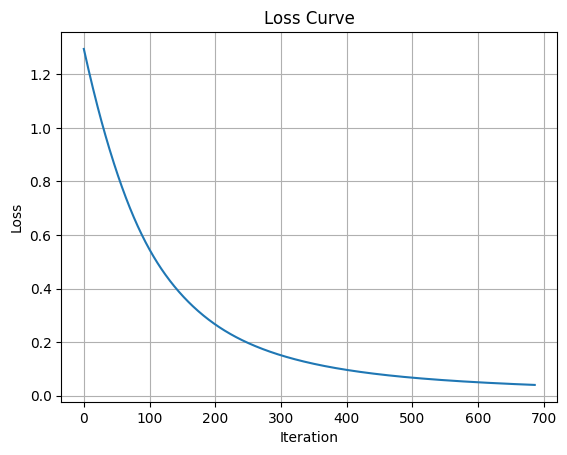

In [5]:
import matplotlib.pyplot as plt
# Show loss curve
plt.plot(clf.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()
plt.show()